# HOO-based algorithms

In [14]:
from copy import deepcopy

import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

from hoo.hoo_node import HOONode
from hoo.state_actions import HOOState
from hoo import HOO, LDHOO, PolyHOO, tHOO
from hoo.environments.test_function import default_function, TestFunction
from hoo.utils import get_tree_info, plot_function_tree

## Example of function with many local maxima

$$x^* = \min_{x\in [0, 1]} \frac{\sin(13x) \sin(27x) + 1}{2} \approx 0.867526$$

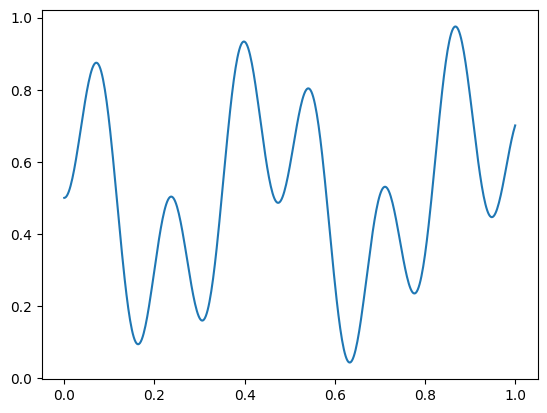

In [2]:
func_env = TestFunction()
initial_state = HOOState(func_env)
func_env.plot()

### Running HOO

In [24]:
hoo = HOO(deepcopy(initial_state))
hoo.run(
    1000,
    sample=True,
)

[0.8675277808178179]

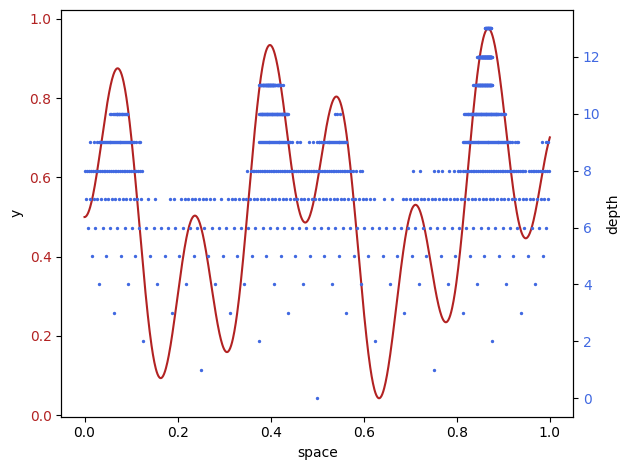

In [25]:
hoo_tree_info = get_tree_info(hoo.root)
plot_function_tree(hoo_tree_info, default_function)

### Running LDHOO

In [26]:
ldhoo = LDHOO(
    deepcopy(initial_state),
    max_depth=7,
)
ldhoo.run(
    1000,
    sample=True,
)

[0.8710169219820832]

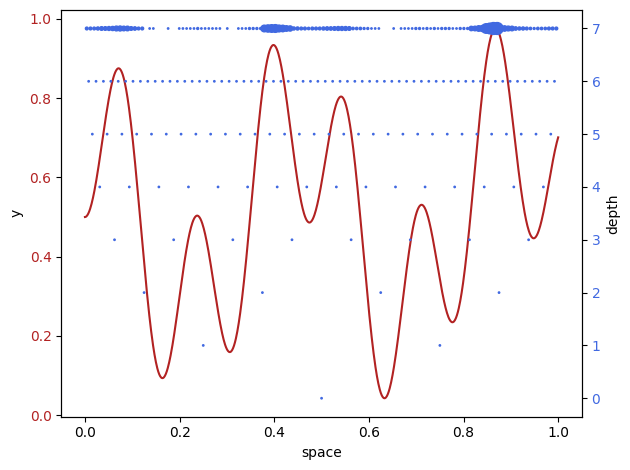

In [27]:
ldhoo_tree_info = get_tree_info(ldhoo.root)
plot_function_tree(ldhoo_tree_info, default_function, max_depth=7)

### Running PolyHOO

In [28]:
polyhoo = PolyHOO(
    deepcopy(initial_state),
    max_depth=7,
)

polyhoo.run(
    1000,
    sample=True,
)

[0.8707163613295396]

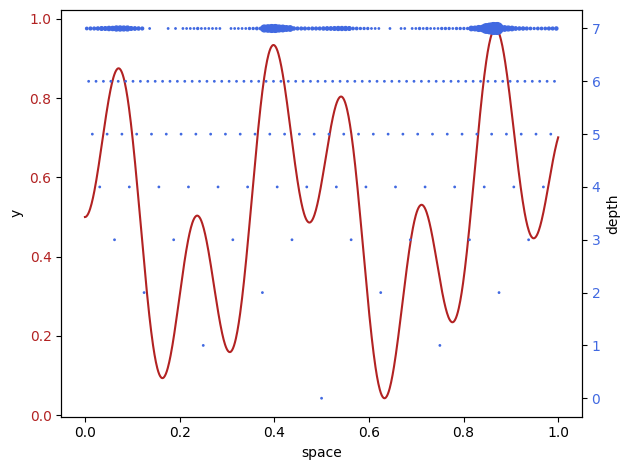

In [29]:
polyhoo_tree_info = get_tree_info(polyhoo.root)
plot_function_tree(polyhoo_tree_info, default_function, max_depth=7)

### Running tHOO

In [30]:
thoo = tHOO(deepcopy(initial_state))
thoo.run(
    1000,
    sample=True,
)

[0.8676270124766327]

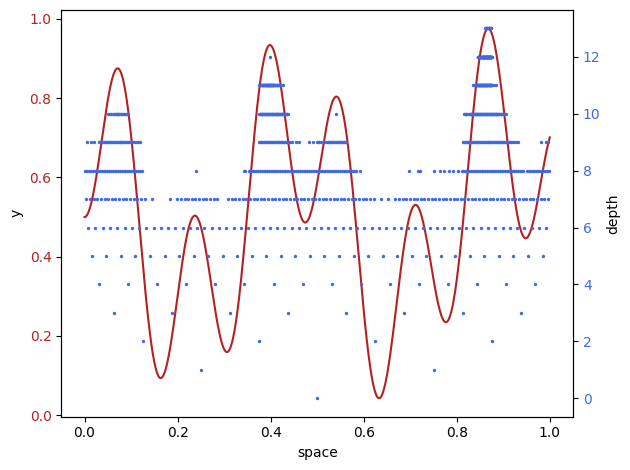

In [31]:
thoo_tree_info = get_tree_info(thoo.root)
plot_function_tree(thoo_tree_info, default_function)

## HOO-based algorithms in Monte Carlo Tree Search

In [1]:
import matplotlib.pyplot as plt

from hoo.experiments.simulator import generate_hoot_path
from hoo.experiments.run_configs import LDHOOTRunConfigs

/home/ricardoqs/miniconda3/envs/hoo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Run LDHOOT

#### Cartpole

Goal: The pole angle must be in the range (-.2095, .2095).

In [6]:
ldhoot_cartpole_configs = LDHOOTRunConfigs(
    environment="cartpole",
    n_actions=150,
    search_depth=30,
    algorithm_iter=100,
    hoo_max_depth=4,
    seed=0,
)

ldhoot_out_cartole = generate_hoot_path(ldhoot_cartpole_configs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:14<00:00,  1.11it/s]


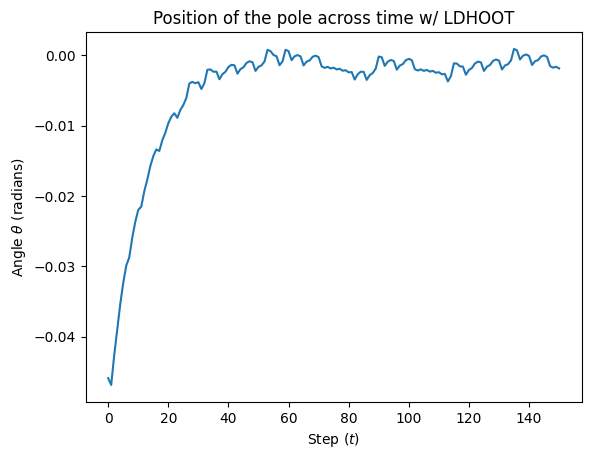

In [7]:
plt.plot([s[2] for s in ldhoot_out_cartole["state"]])
plt.title("Position of the pole across time w/ LDHOOT")
plt.xlabel("Step ($t$)")
plt.ylabel("Angle $\\theta$ (radians)")
plt.show()

#### Increased Gravity Cartpole

**gravity**: 9.8 $\rightarrow$ 50.0

**masspole**: 0.1 $\rightarrow$ 0.5

**length**: 0.5 $\rightarrow$ 2.0

In [8]:
ldhoot_igcartpole_configs_0 = LDHOOTRunConfigs(
    environment="ig_cartpole",
    n_actions=150,
    search_depth=30,
    algorithm_iter=100,
    hoo_max_depth=4,
    seed=0,
)

ldhoot_out_igcartole_0 = generate_hoot_path(ldhoot_igcartpole_configs_0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [01:19<00:00,  1.89it/s]


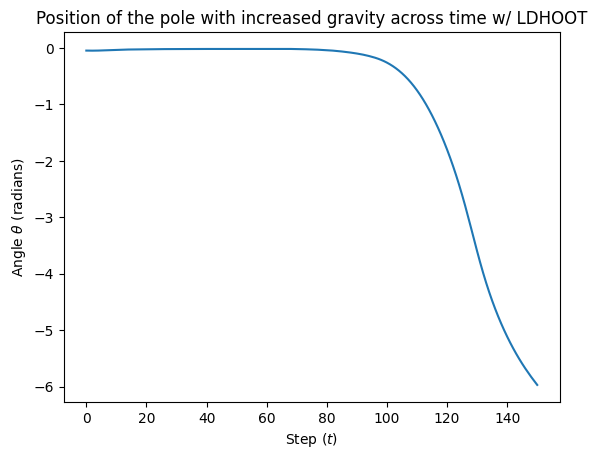

In [9]:
plt.plot([s[2] for s in ldhoot_out_igcartole_0["state"]])
plt.title("Position of the pole with increased gravity across time w/ LDHOOT")
plt.xlabel("Step ($t$)")
plt.ylabel("Angle $\\theta$ (radians)")
plt.show()

In [17]:
ldhoot_igcartpole_configs_1 = LDHOOTRunConfigs(
    environment="ig_cartpole",
    n_actions=150,
    search_depth=50,
    algorithm_iter=150,
    hoo_max_depth=5,
    seed=0,
)

ldhoot_out_igcartole_1 = generate_hoot_path(ldhoot_igcartpole_configs_1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [04:31<00:00,  1.81s/it]


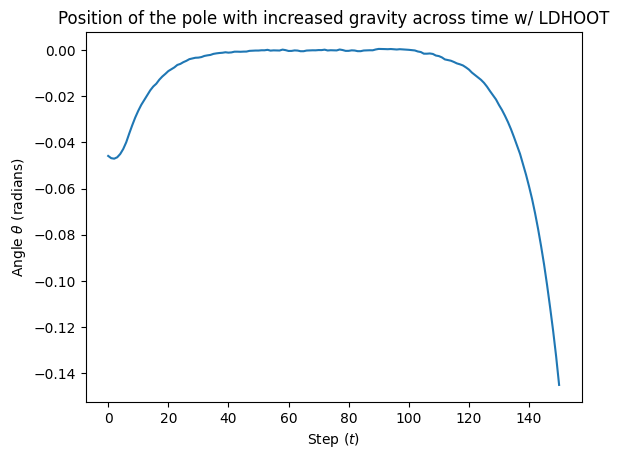

In [18]:
plt.plot([s[2] for s in ldhoot_out_igcartole_1["state"]])
plt.title("Position of the pole with increased gravity across time w/ LDHOOT")
plt.xlabel("Step ($t$)")
plt.ylabel("Angle $\\theta$ (radians)")
plt.show()

#### Inverted Pendulum

The reward function is

$$r = -(\theta^2 + 0.1 * \theta'^2 + 0.001 * \tau^2),$$

where $\theta$ is the angle of the pole, $\theta'$ is the angular velocity of the pole and $\tau$ is the torque exerted to the pole. The reward is highest when both the pole's angle and velocity are equal to $0$. 

In [19]:
ldhoot_pendulum_configs_0 = LDHOOTRunConfigs(
    environment="inverted_pendulum",
    n_actions=150,
    search_depth=50,
    algorithm_iter=100,
    hoo_max_depth=4,
    seed=0,
)

ldhoot_out_pendulum_0 = generate_hoot_path(ldhoot_pendulum_configs_0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [03:57<00:00,  1.58s/it]


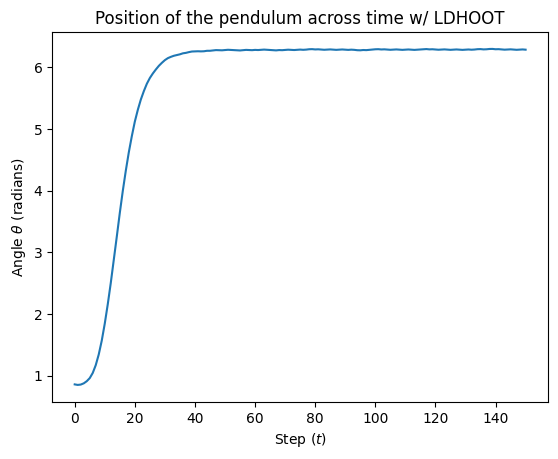

In [22]:
plt.plot([s[0] for s in ldhoot_out_pendulum_0["state"]])
plt.title("Position of the pendulum across time w/ LDHOOT")
plt.xlabel("Step ($t$)")
plt.ylabel("Angle $\\theta$ (radians)")
plt.show()

In [27]:
ldhoot_pendulum_configs_1 = LDHOOTRunConfigs(
    environment="inverted_pendulum",
    n_actions=150,
    search_depth=50,
    algorithm_iter=100,
    hoo_max_depth=4,
    seed=3,
)

ldhoot_out_pendulum_1 = generate_hoot_path(ldhoot_pendulum_configs_1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [05:07<00:00,  2.05s/it]


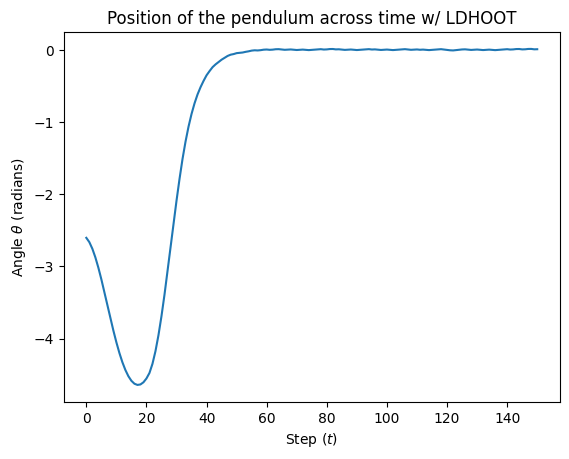

In [28]:
plt.plot([s[0] for s in ldhoot_out_pendulum_1["state"]])
plt.title("Position of the pendulum across time w/ LDHOOT")
plt.xlabel("Step ($t$)")
plt.ylabel("Angle $\\theta$ (radians)")
plt.show()